# Project 2 : Classification of Hsp70 proteins into taxonomic groups based on their amino acid sequences
 This notebook shows how we prepare the dataset, train the model and analyze the features importance. This notebook does not contain the code to compute the variation of the results (performances and feature importance), as this simply repeats what this notebook does but 30 times to obtain a statistical representation of the computed quantities. The code to be able to compute the mean and standard deviation (given in the report), is still provided in an additional notebook called `Notebook_MTP_project2_results.ipynb` . Some cells may take a lot of time to run (especially the hyperparameters optimizations) so please be aware of the estimated time indications. These time indications have been estimated using the CPU of a standard laptop.

## Table of contents
1. [Import libraries](#1.-Import-libraries)
2. [Importing and treating the dataset](#2.-Importing-and-treating-the-data-set)
3. [T-distributed stochatic neighbor embedding](#3.-TSNE)
4. [Mutual information](#4.-Mutual-information)
5. [Training of the random forest](#5.-Random-Forest)
6. [Training of the Neural Network](#6.-Neural-Network)
7. [Features importance](#7.-Features-importance)

## 1. Import libraries and install requirements
The first cell download all the required libraries. See README.md for more informations

In [5]:
%pip install -q --upgrade --user -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [17]:
%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118 --user

Looking in indexes: https://download.pytorch.org/whl/cu118
  Using cached https://download.pytorch.org/whl/cu118/torch-2.1.2%2Bcu118-cp311-cp311-win_amd64.whl (2722.7 MB)
  Attempting uninstall: torch
    Found existing installation: torch 2.2.1
    Uninstalling torch-2.2.1:
      Successfully uninstalled torch-2.2.1
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  You can safely remove it manually.


In [2]:
torch.cuda.is_available()

True

In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
%load_ext autoreload
%autoreload 2

import pandas as pd

from create_batch import *
from datatreatment import *
from neuralnet import *
from visualisations import *
from mutual_info import *
from TSNE import *
from train_rdf import *
from rdf_hyperpara_opti import *
from nn_hyperpara_opti import *
from extract_positions import *
from nn_hyperpara_opti_score import *

C:\Users\pierr\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [5]:
from Interp_opti_BEA import *

number of Bacteria : 
{59810}
---------
number of Eukaryota : 
{36377}
---------
number of Archaea : 
{2207}
---------
shape of dataframe : (98394, 12927)


C:\Users\pierr\OneDrive\Bureau\Semester_project_MA2\Semester_project_Ma2\datatreatment.py:279: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.iloc[:, 0] = data.iloc[:, 0].replace(map_dict)


KeyboardInterrupt: 

## 2. Importing and treating the dataset
This section performs the feature embedding and selects the level of taxonomy where the model will be trained. Make sure to change the path_to_dataset variable. This section can be run in more or less 10 seconds.

In [7]:
path_to_dataset ="C:\\Users\\pierr\\OneDrive\\Bureau\\Semester_project_MA2\\dataset_hsp70_tax.csv" 
#path_to_dataset ="C:\\Users\\pierr\\Desktop\\Semester_project_Ma2\\dataset_hsp70_tax\\dataset_hsp70_tax.csv"
hsp70 = importing_data(path_to_dataset)

     Source  Target  Nbr Sources     pos_y  Count                    Colors
108     141     286     0.333333  0.333333  23889  rgba(181, 172, 100,0.43)
111     141     318     0.333333  0.333333  19458     rgba(237, 0, 61,0.13)
381     295     415     0.333333  0.333333  25989     rgba(0, 113, 35,0.92)
491     122     502     1.000000  1.000000  18046   rgba(42, 162, 142,0.23)
537     415     122     0.666667  0.666667  18059    rgba(185, 243, 0,0.53)
567     286      96     0.666667  0.666667  13237    rgba(49, 76, 125,0.58)
699     440     141     0.000000  0.000000  59810  rgba(170, 239, 118,0.08)
700     440     295     0.000000  0.000000  36377     rgba(3, 33, 191,0.17)


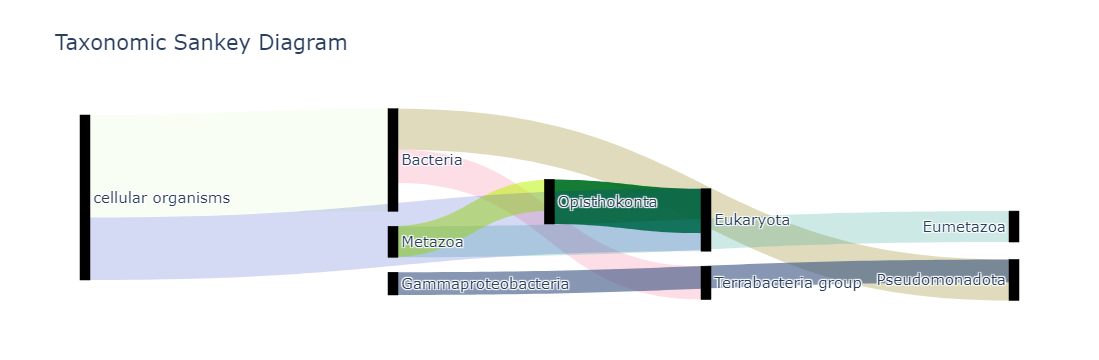

In [3]:
create_sankey_diagram(hsp70,5, 10000, node_pad=15, node_thickness=10, node_label_size=15)

In [8]:
level3, level3_categ= get_data(hsp70, 3, 6,"Bacteria",Use_Others=False)
level3=encode01(level3)
level3=category_to_int(level3,level3_categ)
columns_info = level3.drop(level3.columns[0], axis=1).columns

number of Pseudomonadota : 
{23889}
---------
number of Terrabacteriagroup : 
{19458}
---------
number of FCBgroup : 
{5211}
---------
number of Bacteriaincertaesedis : 
{2557}
---------
number of PVCgroup : 
{2126}
---------
number of Campylobacterota : 
{1082}
---------
shape of dataframe : (54323, 11450)


C:\Users\pierr\Desktop\Semester_project_Ma2\datatreatment.py:279: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.iloc[:, 0] = data.iloc[:, 0].replace(map_dict)


In [9]:
train, train_label, test, test_label, val, val_label=split_dataset(level3, 0.8, 0.1, 0.1)

In [31]:
print(locals())
del level3,level3_categ
print(globals)

{'__name__': '__main__', '__doc__': 'Automatically created module for IPython interactive environment', '__package__': None, '__loader__': None, '__spec__': None, '__builtin__': <module 'builtins' (built-in)>, '__builtins__': <module 'builtins' (built-in)>, '_ih': ['', 'print(globals())', "# Useful starting lines\nget_ipython().run_line_magic('matplotlib', 'inline')\nimport numpy as np\n\nget_ipython().run_line_magic('load_ext', 'autoreload')\nget_ipython().run_line_magic('autoreload', '2')\n\nimport pandas as pd\n\nfrom create_batch import *\nfrom datatreatment import *\nfrom neuralnet import *\nfrom visualisations import *\nfrom mutual_info import *\nfrom TSNE import *\nfrom train_rdf import *\nfrom rdf_hyperpara_opti import *\nfrom nn_hyperpara_opti import *", '#path_to_dataset ="C:\\\\Users\\\\pierr\\\\OneDrive\\\\Bureau\\\\Semester_project_MA2\\\\dataset_hsp70_tax.csv" \npath_to_dataset ="C:\\\\Users\\\\pierr\\\\Desktop\\\\Semester_project_Ma2\\\\dataset_hsp70_tax\\\\dataset_hsp70

NameError: name 'level3' is not defined

In [36]:
train_label

tensor([0, 1, 1,  ..., 0, 0, 0], dtype=torch.int8)

## 3. TSNE
This section performs the T-distributed stochatic neighbor embedding analysis. If done on the entire dataset, it takes 30 minutes. It can also be done on a smaller set by changing the argument of the split_dataset() function.
`X_tsne,labels_tsne,_,_,_,_=split_dataset(level3, 0.1, 0, 0)` will only execute the analysis on 10% of the dataset. Note that TSNE contains randomness, so results may vary slightly from the report and if you change the size of the subset you may need to adapt the complexity (typically a complexitiy of 150 works great with 50% of the dataset).

In [ ]:
perplexity = 350
X_tsne, labels_tsne, _, _, _, _=split_dataset(level3, 1, 0, 0)
tsne = compute_tsne(X_tsne, perplexity)
plot_tsne(tsne, labels_tsne,level3_categ)

## 4. Mutual information
This section computes the mutual information of the features in the dataset. The computation takes approximately 2 hours but can be done on a subset of the entire dataset. `mutual_data = compute_mutual_info(level3,0.1)` will perform the computation on 10 % of the dataset. We also provide a txt file `mutual_data.txt`that contains the calculated values. So, if you want to proceed without waiting for the computation (`mutual_data` is used further), just run the second cell.

In [5]:
mutual_data = compute_mutual_info(level3,0.5)
np.savetxt('mutual_data.txt', mutual_data)

Mutual info computed in 1179.6471717357635 seconds


In [5]:
mutual_data = np.loadtxt('mutual_data.txt',dtype=float)

## 5. Random Forest
This section does the training and hyperparameters optimization of the Random Forest. The hyperparameters optimization for the grid done below takes 14 hours to run. The second cell contains the optimal parameters discribed in the report, so skip the first cell if you don't want to go through the hyperparameter optimizations. The training of the Random Forest, with the hyperparameters that we selected, takes 4 minutes.

In [27]:
parameter_grid = {
        'n_estimators': [50,100],
        'max_depth':[200,300,400],
        'max_features':[100,200,400],
        'bootstrap':[False,True],
        'class_weight':['balanced'], 
        'min_samples_leaf':[5,10,20]
        }
train, train_label, test, test_label, val, val_label=split_dataset(level3, 0.8, 0.1, 0.1)


best_para = optimize_hyperparameters_rf(train, train_label, test, test_label,parameter_grid,15)

Hyperparameters: {'n_estimators': 50, 'max_depth': 200, 'max_features': 100, 'bootstrap': False, 'class_weight': 'balanced', 'min_samples_leaf': 5}, Mean Validation F1 Score: 0.9482660636318134, Std Validation F1 Score: 0.003081218817447622
Hyperparameters: {'n_estimators': 50, 'max_depth': 200, 'max_features': 100, 'bootstrap': False, 'class_weight': 'balanced', 'min_samples_leaf': 10}, Mean Validation F1 Score: 0.9355854658951667, Std Validation F1 Score: 0.002970405392548438


KeyboardInterrupt: 

In [6]:
best_para = ({'n_estimators': 100, 'max_depth': 400, 'max_features': 400, 'bootstrap': False, 'class_weight': 'balanced', 'min_samples_leaf': 5}, 0, 0)

Parameters are: {'n_estimators': 100, 'max_depth': 400, 'max_features': 400, 'bootstrap': False, 'class_weight': 'balanced', 'min_samples_leaf': 5}
Training done
Accuracy: 97.8432%, F1 Weighted Score: 0.9783, F1 Macro score: 0.9642


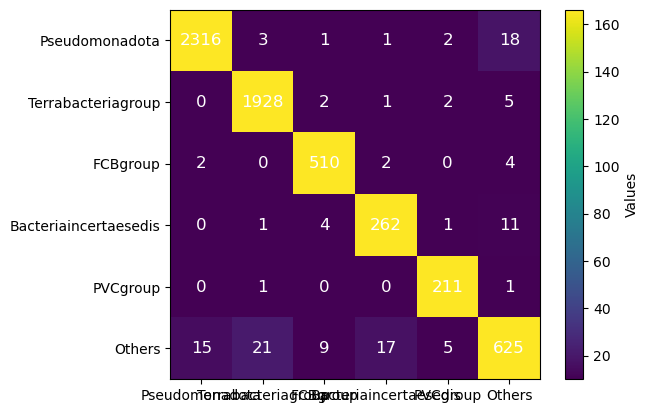

In [7]:
model_rdf = train_random_forest(train, train_label,test, test_label,best_para[0])
val_pred = model_rdf.predict(val)
convolution_matrix(val_label,val_pred,level3_categ)

## 6. Neural Network
This section does the training and hyperparameters optimization of the Neural Network. The hyperparameters optimization for the grid done below takes 14 hours to run using a GPU. The second cell contains the optimal parameters discribed in the report, so skip the first cell if you don't want to go through the hyperparameter optimization. Also, don't execute the second one if you want to use your optimized hyperparameters. The training of the Neural Network, with the hyperparameters that we selected, takes 20 seconds if a GPU is used and 4 minutes the computation is done on the CPU.

In [ ]:
param_grid = {
        'layer_dim': [64,128,256],
        'number_hidden_layer': [2,3],
        'dropout_prob': [0.2,0.3],
        'l2_regu': [1e-05],
        'weight_decay': [0.0001],
        'learning_rate':[0.001, 0.0001],
        'batch_size':[256, 128],
        'num_epochs':[10,15]
        }

positions_to_keep =range(550,600)

level3_extracted = extract_positions(level3,positions_to_keep)


train, train_label, test, test_label, val, val_label=split_dataset(level3, 0.8, 0.1, 0.1)
cv=5
output_dim = 6
best_params_nn, mean_f1_score_nn, std_f1_score_nn = optimize_hyperparameters_nn(train, train_label, val, val_label, cv,output_dim,param_grid)

In [8]:
param_grid = {
        'layer_dim': [64,128,256],
        'number_hidden_layer': [2,3],
        'dropout_prob': [0.2,0.3],
        'l2_regu': [1e-05],
        'weight_decay': [0.0001],
        'learning_rate':[0.001, 0.0001],
        'batch_size':[256, 128],
        'num_epochs':[10,15]
        }

positions_to_keep =range(0,600)
nbr_training = 10

#level3_extracted = extract_positions(level3,positions_to_keep)


train, train_label, test, test_label, val, val_label=split_dataset(level3, 0.8, 0.1, 0.1)

output_dim = 6
best_params_nn, mean_f1_score_nn, std_f1_score_nn = optimize_hyperparameters_nn_score(train, train_label, val, val_label, output_dim,columns_info,param_grid,10,positions_to_keep)



KeyboardInterrupt: 

In [10]:
best_params_nn = {'layer_dim': 64, 'number_hidden_layer': 3, 'dropout_prob': 0.2, 'l2_regu': 1e-05, 'weight_decay': 0.0001, 'learning_rate': 0.001, 'batch_size': 128, 'num_epochs': 15}

In [ ]:
#best_params_nn = {'layer_dim': 256, 'number_hidden_layer': 3, 'dropout_prob': 0.2, 'l2_regu': 1e-05, 'weight_decay': 0.0001, 'learning_rate': 0.0001, 'batch_size': 256, 'num_epochs': 10}

In [12]:
layer_dim = best_params_nn['layer_dim']
number_hidden_layer = best_params_nn['number_hidden_layer']
dropout_prob = best_params_nn['dropout_prob']
l2_regu = best_params_nn['l2_regu']
weight_decay = best_params_nn['weight_decay']
learning_rate = best_params_nn['learning_rate']
batch_size = best_params_nn['batch_size']
num_epochs = best_params_nn['num_epochs']

train, train_label, test, test_label, val, val_label=split_dataset(level3, 0.8, 0.1, 0.1)
train = torch.cat([train,val],dim = 0)
train_label = torch.cat([train_label,val_label],dim = 0)
input_dim = train.shape[1]
output_dim = 6

Epoch [1/15], Training Loss: 0.0673
Epoch [1/15], Validation Loss: 0.0521
Epoch [1/15], Validation Accuracy: 98.8402%
Epoch [2/15], Training Loss: 0.0120
Epoch [2/15], Validation Loss: 0.0476
Epoch [2/15], Validation Accuracy: 98.9875%
Epoch [3/15], Training Loss: 0.0108
Epoch [3/15], Validation Loss: 0.0566
Epoch [3/15], Validation Accuracy: 99.0611%
Epoch [4/15], Training Loss: 0.0153
Epoch [4/15], Validation Loss: 0.0504
Epoch [4/15], Validation Accuracy: 99.0795%
Epoch [5/15], Training Loss: 0.0108
Epoch [5/15], Validation Loss: 0.0475
Epoch [5/15], Validation Accuracy: 99.1163%
Epoch [6/15], Training Loss: 0.0643
Epoch [6/15], Validation Loss: 0.0591
Epoch [6/15], Validation Accuracy: 98.9691%
Epoch [7/15], Training Loss: 0.0042
Epoch [7/15], Validation Loss: 0.0535
Epoch [7/15], Validation Accuracy: 99.0979%
Epoch [8/15], Training Loss: 0.0045
Epoch [8/15], Validation Loss: 0.0557
Epoch [8/15], Validation Accuracy: 99.0427%
Epoch [9/15], Training Loss: 0.0133
Epoch [9/15], Valida

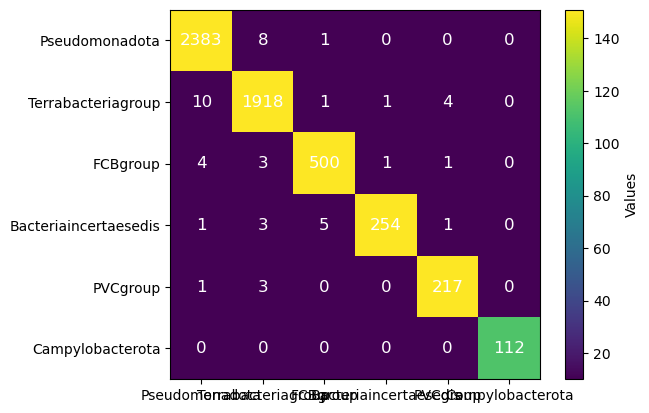

In [13]:
model_neural = ModelClassification(input_dim, output_dim, layer_dim, number_hidden_layer, dropout_prob, l2_regu)
optimizer = torch.optim.Adam(model_neural.parameters(), lr = learning_rate, weight_decay=weight_decay)
train_model(model_neural, num_epochs, train, train_label, test, test_label, optimizer, batch_size)


if torch.cuda.is_available():
    model_neural = model_neural.cpu()
test_outputs = model_neural(test)
test_pred = test_outputs.argmax(dim=1)
convolution_matrix(test_label,test_pred,level3_categ)

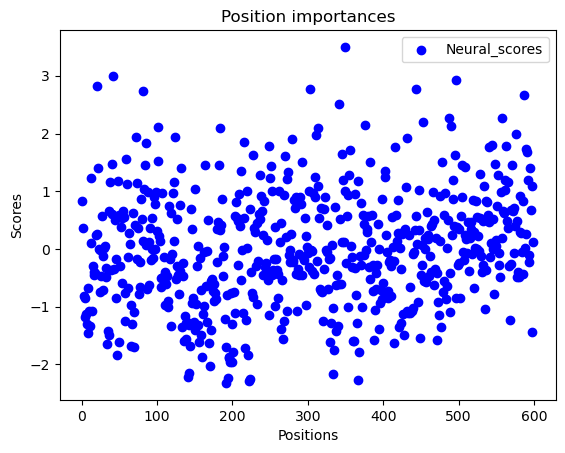

Neural_scores
pos_1         0.833301
pos_2         0.360030
pos_3        -0.821595
pos_4        -0.851406
pos_5        -1.176357
...                ...
pos_595       1.404285
pos_596       0.671469
pos_597       1.083270
pos_598      -1.439872
pos_599       0.128177

[599 rows x 1 columns]

In [14]:
feature_importances_neural(model_neural, columns_info, smoothness = 0, plot = 1)

Epoch [1/15], Training Loss: 1.3056
Epoch [1/15], Validation Loss: 1.2040
Epoch [1/15], Validation Accuracy: 77.7982%
Epoch [2/15], Training Loss: 0.9899
Epoch [2/15], Validation Loss: 0.9547
Epoch [2/15], Validation Accuracy: 78.7371%
Epoch [3/15], Training Loss: 0.9436
Epoch [3/15], Validation Loss: 0.8266
Epoch [3/15], Validation Accuracy: 78.7739%
Epoch [4/15], Training Loss: 0.8520
Epoch [4/15], Validation Loss: 0.7668
Epoch [4/15], Validation Accuracy: 78.9028%
Epoch [5/15], Training Loss: 0.6853
Epoch [5/15], Validation Loss: 0.7274
Epoch [5/15], Validation Accuracy: 79.0685%
Epoch [6/15], Training Loss: 0.8688
Epoch [6/15], Validation Loss: 0.6927
Epoch [6/15], Validation Accuracy: 79.1605%
Epoch [7/15], Training Loss: 0.8039
Epoch [7/15], Validation Loss: 0.6516
Epoch [7/15], Validation Accuracy: 79.1421%
Epoch [8/15], Training Loss: 0.8897
Epoch [8/15], Validation Loss: 0.6182
Epoch [8/15], Validation Accuracy: 79.1421%
Epoch [9/15], Training Loss: 0.7766
Epoch [9/15], Valida

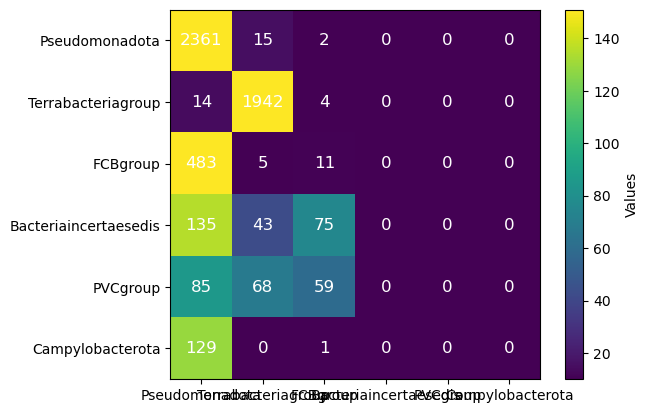

In [220]:
positions_to_keep =range(500,600)

level3_extracted = extract_positions(level3,positions_to_keep)

columns_info = level3_extracted.drop(level3_extracted.columns[0], axis=1).columns

layer_dim = best_params_nn['layer_dim']
number_hidden_layer = best_params_nn['number_hidden_layer']
dropout_prob = best_params_nn['dropout_prob']
l2_regu = best_params_nn['l2_regu']
weight_decay = best_params_nn['weight_decay']
learning_rate = best_params_nn['learning_rate']
batch_size = best_params_nn['batch_size']
num_epochs = best_params_nn['num_epochs']

train, train_label, test, test_label, val, val_label=split_dataset(level3_extracted, 0.8, 0.1, 0.1)
train = torch.cat([train,val],dim = 0)
train_label = torch.cat([train_label,val_label],dim = 0)
input_dim = train.shape[1]
output_dim = 6

model_neural = ModelClassification(input_dim, output_dim, layer_dim, number_hidden_layer, dropout_prob, l2_regu)
optimizer = torch.optim.Adam(model_neural.parameters(), lr = learning_rate, weight_decay=weight_decay)
train_model(model_neural, num_epochs, train, train_label, test, test_label, optimizer, batch_size)


if torch.cuda.is_available():
    model_neural = model_neural.cpu()
test_outputs = model_neural(test)
test_pred = test_outputs.argmax(dim=1)
convolution_matrix(test_label,test_pred,level3_categ)

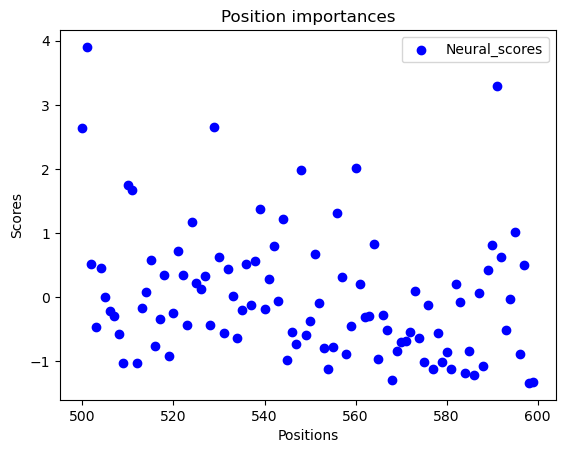

Neural_scores
pos_500       2.638838
pos_501       3.904087
pos_502       0.519196
pos_503      -0.476639
pos_504       0.457643
...                ...
pos_595       1.017287
pos_596      -0.897680
pos_597       0.494514
pos_598      -1.344236
pos_599      -1.325229

[100 rows x 1 columns]

In [221]:
feature_importances_neural(model_neural, columns_info, smoothness = 1, pos =positions_to_keep, plot = 1)

Epoch [1/15], Training Loss: 0.0330
Epoch [1/15], Validation Loss: 0.0427
Epoch [1/15], Validation Accuracy: 99.1163%
Epoch [2/15], Training Loss: 0.0672
Epoch [2/15], Validation Loss: 0.0362
Epoch [2/15], Validation Accuracy: 99.2268%
Epoch [3/15], Training Loss: 0.0093
Epoch [3/15], Validation Loss: 0.0428
Epoch [3/15], Validation Accuracy: 99.1348%
Epoch [4/15], Training Loss: 0.0064
Epoch [4/15], Validation Loss: 0.0400
Epoch [4/15], Validation Accuracy: 99.3004%
Epoch [5/15], Training Loss: 0.0888
Epoch [5/15], Validation Loss: 0.0448
Epoch [5/15], Validation Accuracy: 99.0979%
Epoch [6/15], Training Loss: 0.0031
Epoch [6/15], Validation Loss: 0.0453
Epoch [6/15], Validation Accuracy: 99.2084%
Epoch [7/15], Training Loss: 0.0255
Epoch [7/15], Validation Loss: 0.0408
Epoch [7/15], Validation Accuracy: 99.1532%
Epoch [8/15], Training Loss: 0.0053
Epoch [8/15], Validation Loss: 0.0437
Epoch [8/15], Validation Accuracy: 99.2636%
Epoch [9/15], Training Loss: 0.0124
Epoch [9/15], Valida

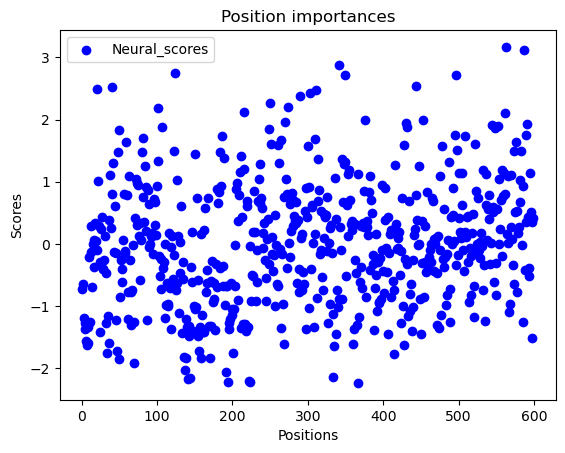

Got to iteration 1 in 21.408747911453247 seconds
Epoch [1/15], Training Loss: 0.0711
Epoch [1/15], Validation Loss: 0.0432
Epoch [1/15], Validation Accuracy: 99.1163%
Epoch [2/15], Training Loss: 0.1093
Epoch [2/15], Validation Loss: 0.0428
Epoch [2/15], Validation Accuracy: 99.0979%
Epoch [3/15], Training Loss: 0.0145
Epoch [3/15], Validation Loss: 0.0451
Epoch [3/15], Validation Accuracy: 99.0979%
Epoch [4/15], Training Loss: 0.0060
Epoch [4/15], Validation Loss: 0.0429
Epoch [4/15], Validation Accuracy: 99.1532%
Epoch [5/15], Training Loss: 0.0286
Epoch [5/15], Validation Loss: 0.0437
Epoch [5/15], Validation Accuracy: 99.0979%
Epoch [6/15], Training Loss: 0.0163
Epoch [6/15], Validation Loss: 0.0434
Epoch [6/15], Validation Accuracy: 99.1900%
Epoch [7/15], Training Loss: 0.0112
Epoch [7/15], Validation Loss: 0.0453
Epoch [7/15], Validation Accuracy: 99.0979%
Epoch [8/15], Training Loss: 0.0828
Epoch [8/15], Validation Loss: 0.0475
Epoch [8/15], Validation Accuracy: 99.1348%
Epoch [

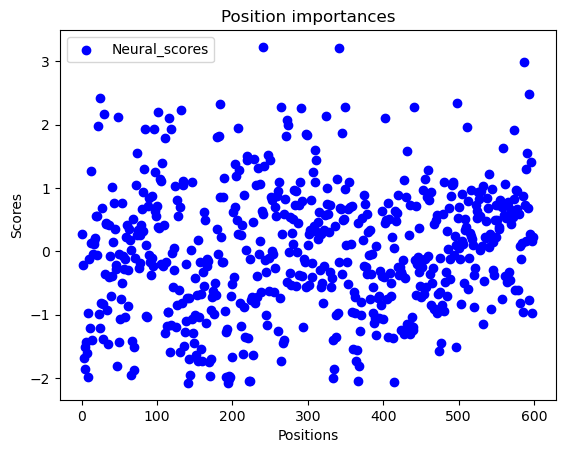

Got to iteration 2 in 43.73161768913269 seconds
Epoch [1/15], Training Loss: 0.0848
Epoch [1/15], Validation Loss: 0.0542
Epoch [1/15], Validation Accuracy: 98.8402%
Epoch [2/15], Training Loss: 0.0241
Epoch [2/15], Validation Loss: 0.0468
Epoch [2/15], Validation Accuracy: 99.0611%
Epoch [3/15], Training Loss: 0.0701
Epoch [3/15], Validation Loss: 0.0490
Epoch [3/15], Validation Accuracy: 98.9691%
Epoch [4/15], Training Loss: 0.0291
Epoch [4/15], Validation Loss: 0.0460
Epoch [4/15], Validation Accuracy: 99.1163%
Epoch [5/15], Training Loss: 0.0465
Epoch [5/15], Validation Loss: 0.0483
Epoch [5/15], Validation Accuracy: 99.0979%
Epoch [6/15], Training Loss: 0.0528
Epoch [6/15], Validation Loss: 0.0499
Epoch [6/15], Validation Accuracy: 99.0611%
Epoch [7/15], Training Loss: 0.0225
Epoch [7/15], Validation Loss: 0.0577
Epoch [7/15], Validation Accuracy: 98.9507%
Epoch [8/15], Training Loss: 0.0186
Epoch [8/15], Validation Loss: 0.0593
Epoch [8/15], Validation Accuracy: 98.9507%
Epoch [9

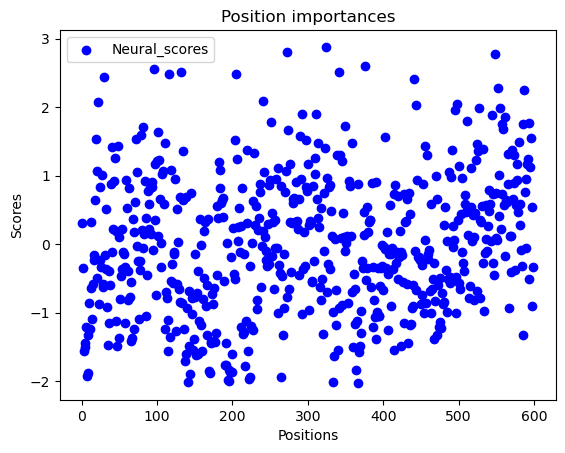

Got to iteration 3 in 65.4528214931488 seconds
Epoch [1/15], Training Loss: 0.0075
Epoch [1/15], Validation Loss: 0.0363
Epoch [1/15], Validation Accuracy: 99.2268%
Epoch [2/15], Training Loss: 0.0188
Epoch [2/15], Validation Loss: 0.0339
Epoch [2/15], Validation Accuracy: 99.2268%
Epoch [3/15], Training Loss: 0.0206
Epoch [3/15], Validation Loss: 0.0441
Epoch [3/15], Validation Accuracy: 99.0979%
Epoch [4/15], Training Loss: 0.0314
Epoch [4/15], Validation Loss: 0.0349
Epoch [4/15], Validation Accuracy: 99.2636%
Epoch [5/15], Training Loss: 0.0268
Epoch [5/15], Validation Loss: 0.0365
Epoch [5/15], Validation Accuracy: 99.3189%
Epoch [6/15], Training Loss: 0.0052
Epoch [6/15], Validation Loss: 0.0374
Epoch [6/15], Validation Accuracy: 99.3557%
Epoch [7/15], Training Loss: 0.0166
Epoch [7/15], Validation Loss: 0.0400
Epoch [7/15], Validation Accuracy: 99.2268%
Epoch [8/15], Training Loss: 0.0212
Epoch [8/15], Validation Loss: 0.0453
Epoch [8/15], Validation Accuracy: 99.0427%
Epoch [9/

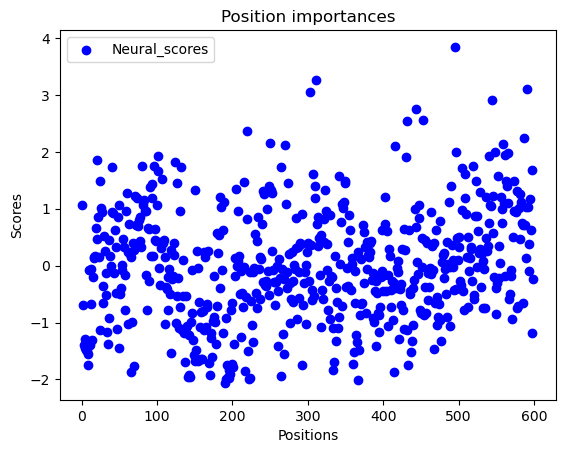

Got to iteration 4 in 87.05557131767273 seconds
Epoch [1/15], Training Loss: 0.0171
Epoch [1/15], Validation Loss: 0.0529
Epoch [1/15], Validation Accuracy: 98.9691%
Epoch [2/15], Training Loss: 0.0069
Epoch [2/15], Validation Loss: 0.0473
Epoch [2/15], Validation Accuracy: 99.0795%
Epoch [3/15], Training Loss: 0.0265
Epoch [3/15], Validation Loss: 0.0462
Epoch [3/15], Validation Accuracy: 99.2084%
Epoch [4/15], Training Loss: 0.0068
Epoch [4/15], Validation Loss: 0.0455
Epoch [4/15], Validation Accuracy: 99.2452%
Epoch [5/15], Training Loss: 0.0211
Epoch [5/15], Validation Loss: 0.0482
Epoch [5/15], Validation Accuracy: 99.0059%
Epoch [6/15], Training Loss: 0.0151
Epoch [6/15], Validation Loss: 0.0470
Epoch [6/15], Validation Accuracy: 99.1532%
Epoch [7/15], Training Loss: 0.0066
Epoch [7/15], Validation Loss: 0.0463
Epoch [7/15], Validation Accuracy: 99.2452%
Epoch [8/15], Training Loss: 0.0028
Epoch [8/15], Validation Loss: 0.0509
Epoch [8/15], Validation Accuracy: 99.2268%
Epoch [9

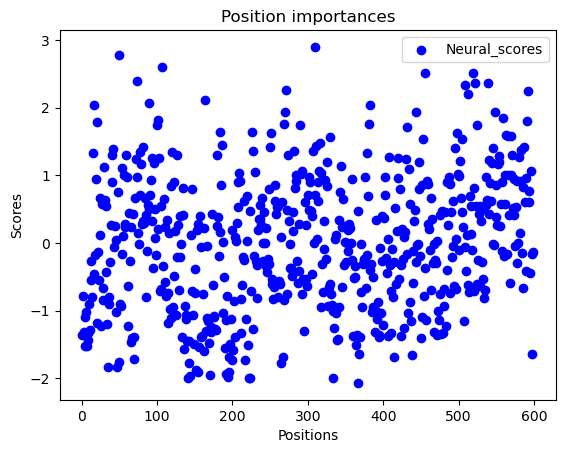

Got to iteration 5 in 109.41888523101807 seconds
Epoch [1/15], Training Loss: 0.0157
Epoch [1/15], Validation Loss: 0.0552
Epoch [1/15], Validation Accuracy: 98.8770%
Epoch [2/15], Training Loss: 0.0448
Epoch [2/15], Validation Loss: 0.0501
Epoch [2/15], Validation Accuracy: 99.1532%
Epoch [3/15], Training Loss: 0.0167
Epoch [3/15], Validation Loss: 0.0475
Epoch [3/15], Validation Accuracy: 99.1716%
Epoch [4/15], Training Loss: 0.0199
Epoch [4/15], Validation Loss: 0.0564
Epoch [4/15], Validation Accuracy: 99.0795%
Epoch [5/15], Training Loss: 0.0126
Epoch [5/15], Validation Loss: 0.0505
Epoch [5/15], Validation Accuracy: 99.1163%
Epoch [6/15], Training Loss: 0.0429
Epoch [6/15], Validation Loss: 0.0603
Epoch [6/15], Validation Accuracy: 98.9691%
Epoch [7/15], Training Loss: 0.0074
Epoch [7/15], Validation Loss: 0.0560
Epoch [7/15], Validation Accuracy: 99.0611%
Epoch [8/15], Training Loss: 0.0150
Epoch [8/15], Validation Loss: 0.0561
Epoch [8/15], Validation Accuracy: 99.0979%
Epoch [

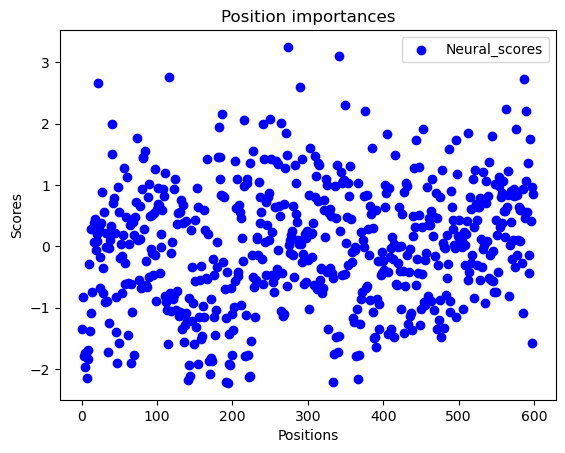

Got to iteration 6 in 133.52427625656128 seconds
Epoch [1/15], Training Loss: 0.0154
Epoch [1/15], Validation Loss: 0.0458
Epoch [1/15], Validation Accuracy: 99.0427%
Epoch [2/15], Training Loss: 0.0062
Epoch [2/15], Validation Loss: 0.0404
Epoch [2/15], Validation Accuracy: 99.2084%
Epoch [3/15], Training Loss: 0.0451
Epoch [3/15], Validation Loss: 0.0486
Epoch [3/15], Validation Accuracy: 98.9507%
Epoch [4/15], Training Loss: 0.0327
Epoch [4/15], Validation Loss: 0.0435
Epoch [4/15], Validation Accuracy: 99.1348%
Epoch [5/15], Training Loss: 0.0120
Epoch [5/15], Validation Loss: 0.0402
Epoch [5/15], Validation Accuracy: 99.1900%
Epoch [6/15], Training Loss: 0.0037
Epoch [6/15], Validation Loss: 0.0459
Epoch [6/15], Validation Accuracy: 99.1900%
Epoch [7/15], Training Loss: 0.0152
Epoch [7/15], Validation Loss: 0.0474
Epoch [7/15], Validation Accuracy: 99.2268%
Epoch [8/15], Training Loss: 0.0081
Epoch [8/15], Validation Loss: 0.0420
Epoch [8/15], Validation Accuracy: 99.2268%
Epoch [

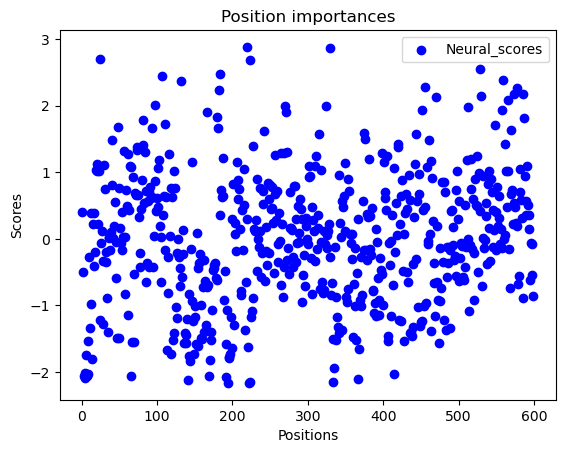

Got to iteration 7 in 156.3510344028473 seconds
Epoch [1/15], Training Loss: 0.0817
Epoch [1/15], Validation Loss: 0.0415
Epoch [1/15], Validation Accuracy: 99.1532%
Epoch [2/15], Training Loss: 0.0139
Epoch [2/15], Validation Loss: 0.0457
Epoch [2/15], Validation Accuracy: 99.0795%
Epoch [3/15], Training Loss: 0.0079
Epoch [3/15], Validation Loss: 0.0383
Epoch [3/15], Validation Accuracy: 99.3004%
Epoch [4/15], Training Loss: 0.0707
Epoch [4/15], Validation Loss: 0.0452
Epoch [4/15], Validation Accuracy: 99.0979%
Epoch [5/15], Training Loss: 0.0468
Epoch [5/15], Validation Loss: 0.0443
Epoch [5/15], Validation Accuracy: 99.2084%
Epoch [6/15], Training Loss: 0.0560
Epoch [6/15], Validation Loss: 0.0430
Epoch [6/15], Validation Accuracy: 99.2636%
Epoch [7/15], Training Loss: 0.0183
Epoch [7/15], Validation Loss: 0.0447
Epoch [7/15], Validation Accuracy: 99.1532%
Epoch [8/15], Training Loss: 0.0027
Epoch [8/15], Validation Loss: 0.0413
Epoch [8/15], Validation Accuracy: 99.3557%
Epoch [9

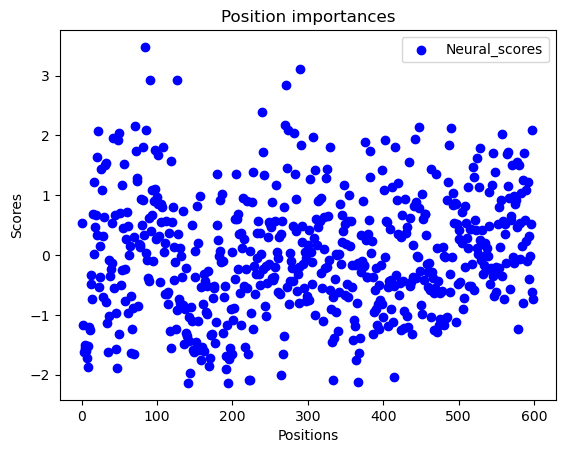

Got to iteration 8 in 178.86120533943176 seconds
Epoch [1/15], Training Loss: 0.1249
Epoch [1/15], Validation Loss: 0.0423
Epoch [1/15], Validation Accuracy: 99.1532%
Epoch [2/15], Training Loss: 0.0208
Epoch [2/15], Validation Loss: 0.0424
Epoch [2/15], Validation Accuracy: 99.2268%
Epoch [3/15], Training Loss: 0.0210
Epoch [3/15], Validation Loss: 0.0483
Epoch [3/15], Validation Accuracy: 99.1348%
Epoch [4/15], Training Loss: 0.0079
Epoch [4/15], Validation Loss: 0.0459
Epoch [4/15], Validation Accuracy: 99.2084%
Epoch [5/15], Training Loss: 0.0224
Epoch [5/15], Validation Loss: 0.0463
Epoch [5/15], Validation Accuracy: 99.3189%
Epoch [6/15], Training Loss: 0.0235
Epoch [6/15], Validation Loss: 0.0470
Epoch [6/15], Validation Accuracy: 99.2084%
Epoch [7/15], Training Loss: 0.0038
Epoch [7/15], Validation Loss: 0.0476
Epoch [7/15], Validation Accuracy: 99.3004%
Epoch [8/15], Training Loss: 0.0186
Epoch [8/15], Validation Loss: 0.0615
Epoch [8/15], Validation Accuracy: 98.9691%
Epoch [

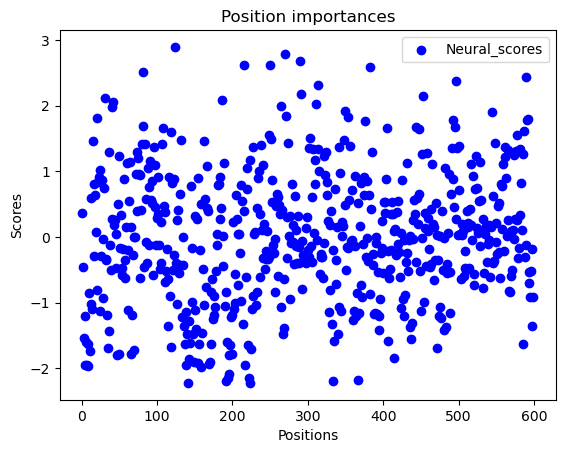

Got to iteration 9 in 202.07649159431458 seconds
Epoch [1/15], Training Loss: 0.0682
Epoch [1/15], Validation Loss: 0.0384
Epoch [1/15], Validation Accuracy: 99.2452%
Epoch [2/15], Training Loss: 0.0051
Epoch [2/15], Validation Loss: 0.0357
Epoch [2/15], Validation Accuracy: 99.3189%
Epoch [3/15], Training Loss: 0.0430
Epoch [3/15], Validation Loss: 0.0386
Epoch [3/15], Validation Accuracy: 99.1716%
Epoch [4/15], Training Loss: 0.0180
Epoch [4/15], Validation Loss: 0.0529
Epoch [4/15], Validation Accuracy: 98.9507%
Epoch [5/15], Training Loss: 0.0118
Epoch [5/15], Validation Loss: 0.0455
Epoch [5/15], Validation Accuracy: 99.2268%
Epoch [6/15], Training Loss: 0.0158
Epoch [6/15], Validation Loss: 0.0430
Epoch [6/15], Validation Accuracy: 99.2268%
Epoch [7/15], Training Loss: 0.0035
Epoch [7/15], Validation Loss: 0.0489
Epoch [7/15], Validation Accuracy: 99.1716%
Epoch [8/15], Training Loss: 0.0138
Epoch [8/15], Validation Loss: 0.0509
Epoch [8/15], Validation Accuracy: 99.2084%
Epoch [

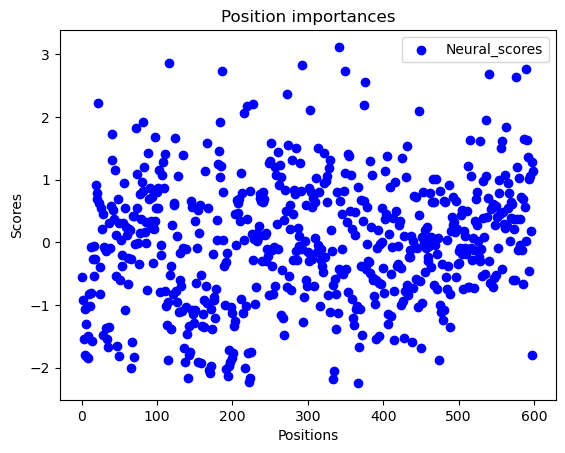

Got to iteration 10 in 224.80835509300232 seconds
Epoch [1/15], Training Loss: 0.1098
Epoch [1/15], Validation Loss: 0.0583
Epoch [1/15], Validation Accuracy: 98.8586%
Epoch [2/15], Training Loss: 0.0268
Epoch [2/15], Validation Loss: 0.0504
Epoch [2/15], Validation Accuracy: 99.0611%
Epoch [3/15], Training Loss: 0.0230
Epoch [3/15], Validation Loss: 0.0451
Epoch [3/15], Validation Accuracy: 99.0795%
Epoch [4/15], Training Loss: 0.0168
Epoch [4/15], Validation Loss: 0.0517
Epoch [4/15], Validation Accuracy: 98.9691%
Epoch [5/15], Training Loss: 0.0051
Epoch [5/15], Validation Loss: 0.0586
Epoch [5/15], Validation Accuracy: 98.9691%
Epoch [6/15], Training Loss: 0.0088
Epoch [6/15], Validation Loss: 0.0572
Epoch [6/15], Validation Accuracy: 99.0427%
Epoch [7/15], Training Loss: 0.0058
Epoch [7/15], Validation Loss: 0.0629
Epoch [7/15], Validation Accuracy: 98.9507%
Epoch [8/15], Training Loss: 0.0065
Epoch [8/15], Validation Loss: 0.0705
Epoch [8/15], Validation Accuracy: 98.8034%
Epoch 

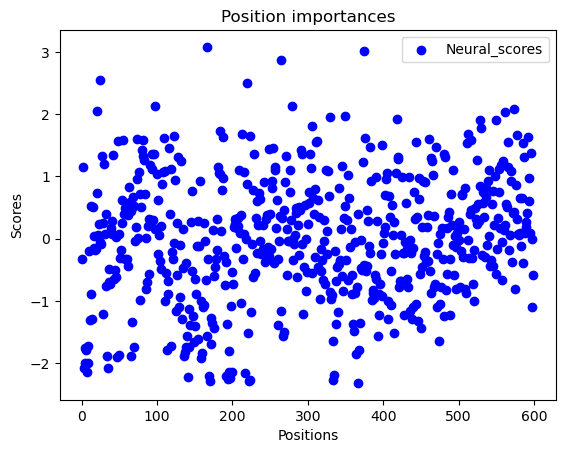

Got to iteration 11 in 247.64728379249573 seconds
Epoch [1/15], Training Loss: 0.0707
Epoch [1/15], Validation Loss: 0.0445
Epoch [1/15], Validation Accuracy: 98.9323%
Epoch [2/15], Training Loss: 0.0806
Epoch [2/15], Validation Loss: 0.0492
Epoch [2/15], Validation Accuracy: 98.9875%
Epoch [3/15], Training Loss: 0.0384
Epoch [3/15], Validation Loss: 0.0469
Epoch [3/15], Validation Accuracy: 99.0427%
Epoch [4/15], Training Loss: 0.0223
Epoch [4/15], Validation Loss: 0.0565
Epoch [4/15], Validation Accuracy: 98.9323%
Epoch [5/15], Training Loss: 0.0375
Epoch [5/15], Validation Loss: 0.0520
Epoch [5/15], Validation Accuracy: 99.0427%
Epoch [6/15], Training Loss: 0.0402
Epoch [6/15], Validation Loss: 0.0607
Epoch [6/15], Validation Accuracy: 99.0059%
Epoch [7/15], Training Loss: 0.0039
Epoch [7/15], Validation Loss: 0.0573
Epoch [7/15], Validation Accuracy: 99.1532%
Epoch [8/15], Training Loss: 0.0201
Epoch [8/15], Validation Loss: 0.0577
Epoch [8/15], Validation Accuracy: 99.1163%
Epoch 

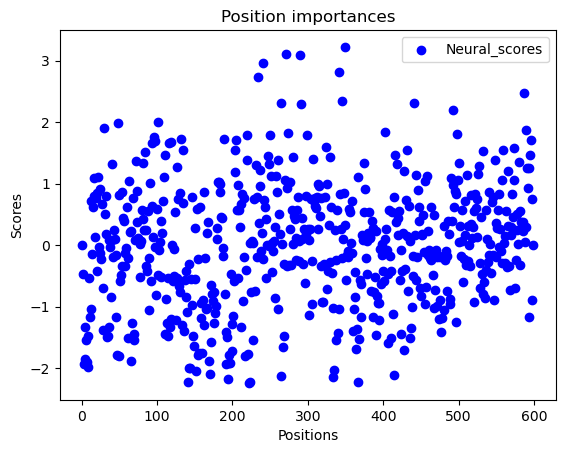

Got to iteration 12 in 272.42625427246094 seconds
Epoch [1/15], Training Loss: 0.0126
Epoch [1/15], Validation Loss: 0.0505
Epoch [1/15], Validation Accuracy: 98.9691%
Epoch [2/15], Training Loss: 0.0051
Epoch [2/15], Validation Loss: 0.0573
Epoch [2/15], Validation Accuracy: 98.9875%
Epoch [3/15], Training Loss: 0.0717
Epoch [3/15], Validation Loss: 0.0513
Epoch [3/15], Validation Accuracy: 99.2084%
Epoch [4/15], Training Loss: 0.0172
Epoch [4/15], Validation Loss: 0.0615
Epoch [4/15], Validation Accuracy: 98.9691%
Epoch [5/15], Training Loss: 0.0227
Epoch [5/15], Validation Loss: 0.0573
Epoch [5/15], Validation Accuracy: 99.0243%
Epoch [6/15], Training Loss: 0.0076
Epoch [6/15], Validation Loss: 0.0556
Epoch [6/15], Validation Accuracy: 99.0795%
Epoch [7/15], Training Loss: 0.0118
Epoch [7/15], Validation Loss: 0.0568
Epoch [7/15], Validation Accuracy: 99.0243%
Epoch [8/15], Training Loss: 0.0087
Epoch [8/15], Validation Loss: 0.0599
Epoch [8/15], Validation Accuracy: 99.0243%
Epoch 

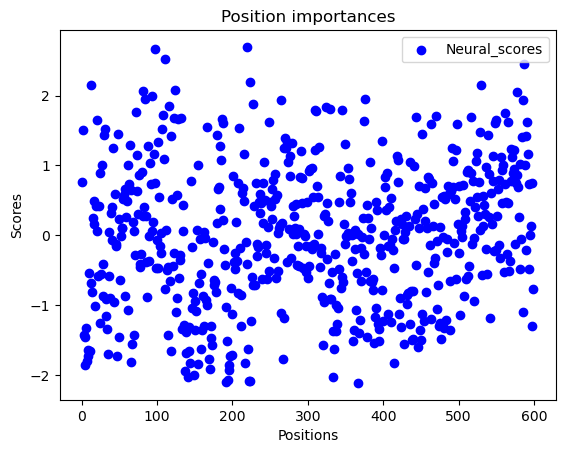

Got to iteration 13 in 296.0740256309509 seconds
Epoch [1/15], Training Loss: 0.0123
Epoch [1/15], Validation Loss: 0.0541
Epoch [1/15], Validation Accuracy: 98.9323%
Epoch [2/15], Training Loss: 0.0966
Epoch [2/15], Validation Loss: 0.0418
Epoch [2/15], Validation Accuracy: 99.1900%
Epoch [3/15], Training Loss: 0.0583
Epoch [3/15], Validation Loss: 0.0497
Epoch [3/15], Validation Accuracy: 99.0059%
Epoch [4/15], Training Loss: 0.0196
Epoch [4/15], Validation Loss: 0.0519
Epoch [4/15], Validation Accuracy: 99.1163%
Epoch [5/15], Training Loss: 0.0857
Epoch [5/15], Validation Loss: 0.0499
Epoch [5/15], Validation Accuracy: 99.1348%
Epoch [6/15], Training Loss: 0.0186
Epoch [6/15], Validation Loss: 0.0469
Epoch [6/15], Validation Accuracy: 99.1348%
Epoch [7/15], Training Loss: 0.0037
Epoch [7/15], Validation Loss: 0.0486
Epoch [7/15], Validation Accuracy: 99.1163%
Epoch [8/15], Training Loss: 0.0035
Epoch [8/15], Validation Loss: 0.0492
Epoch [8/15], Validation Accuracy: 99.1163%
Epoch [

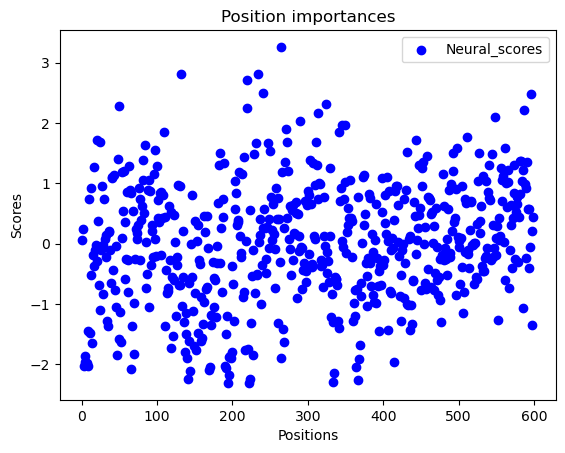

Got to iteration 14 in 318.1011815071106 seconds
Epoch [1/15], Training Loss: 0.0843
Epoch [1/15], Validation Loss: 0.0350
Epoch [1/15], Validation Accuracy: 99.1348%
Epoch [2/15], Training Loss: 0.0093
Epoch [2/15], Validation Loss: 0.0332
Epoch [2/15], Validation Accuracy: 99.3189%
Epoch [3/15], Training Loss: 0.0090
Epoch [3/15], Validation Loss: 0.0326
Epoch [3/15], Validation Accuracy: 99.3189%
Epoch [4/15], Training Loss: 0.0104
Epoch [4/15], Validation Loss: 0.0394
Epoch [4/15], Validation Accuracy: 99.1716%
Epoch [5/15], Training Loss: 0.0025
Epoch [5/15], Validation Loss: 0.0354
Epoch [5/15], Validation Accuracy: 99.2820%
Epoch [6/15], Training Loss: 0.0630
Epoch [6/15], Validation Loss: 0.0410
Epoch [6/15], Validation Accuracy: 99.2636%
Epoch [7/15], Training Loss: 0.0108
Epoch [7/15], Validation Loss: 0.0428
Epoch [7/15], Validation Accuracy: 99.3189%
Epoch [8/15], Training Loss: 0.0095
Epoch [8/15], Validation Loss: 0.0450
Epoch [8/15], Validation Accuracy: 99.1532%
Epoch [

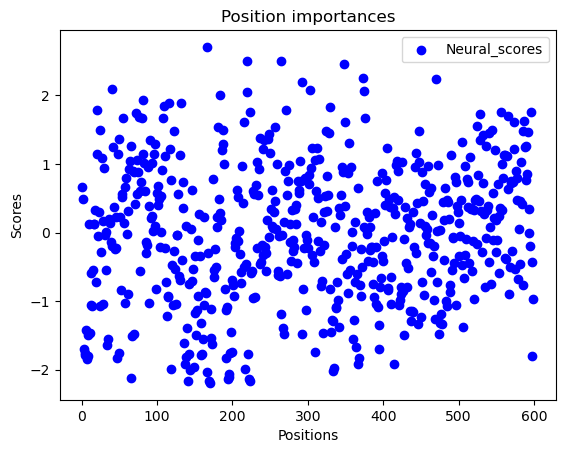

Got to iteration 15 in 341.07502913475037 seconds
Epoch [1/15], Training Loss: 0.0914
Epoch [1/15], Validation Loss: 0.0495
Epoch [1/15], Validation Accuracy: 99.0611%
Epoch [2/15], Training Loss: 0.0217
Epoch [2/15], Validation Loss: 0.0419
Epoch [2/15], Validation Accuracy: 99.2084%
Epoch [3/15], Training Loss: 0.0254
Epoch [3/15], Validation Loss: 0.0506
Epoch [3/15], Validation Accuracy: 99.1348%
Epoch [4/15], Training Loss: 0.0132
Epoch [4/15], Validation Loss: 0.0491
Epoch [4/15], Validation Accuracy: 99.1163%
Epoch [5/15], Training Loss: 0.0096
Epoch [5/15], Validation Loss: 0.0539
Epoch [5/15], Validation Accuracy: 99.0427%
Epoch [6/15], Training Loss: 0.0271
Epoch [6/15], Validation Loss: 0.0541
Epoch [6/15], Validation Accuracy: 99.1163%
Epoch [7/15], Training Loss: 0.0130
Epoch [7/15], Validation Loss: 0.0518
Epoch [7/15], Validation Accuracy: 99.1716%
Epoch [8/15], Training Loss: 0.0479
Epoch [8/15], Validation Loss: 0.0507
Epoch [8/15], Validation Accuracy: 99.2268%
Epoch 

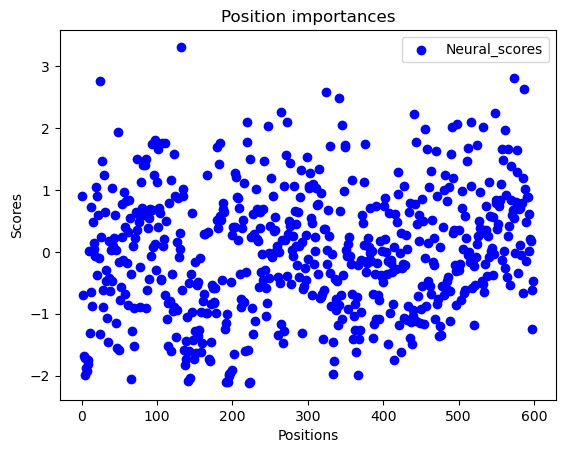

Got to iteration 16 in 363.2289402484894 seconds
Epoch [1/15], Training Loss: 0.0682
Epoch [1/15], Validation Loss: 0.0450
Epoch [1/15], Validation Accuracy: 98.9323%
Epoch [2/15], Training Loss: 0.0651
Epoch [2/15], Validation Loss: 0.0403
Epoch [2/15], Validation Accuracy: 99.1348%
Epoch [3/15], Training Loss: 0.0202
Epoch [3/15], Validation Loss: 0.0412
Epoch [3/15], Validation Accuracy: 99.2268%
Epoch [4/15], Training Loss: 0.0061
Epoch [4/15], Validation Loss: 0.0402
Epoch [4/15], Validation Accuracy: 99.2084%
Epoch [5/15], Training Loss: 0.0656
Epoch [5/15], Validation Loss: 0.0478
Epoch [5/15], Validation Accuracy: 99.1163%
Epoch [6/15], Training Loss: 0.0069
Epoch [6/15], Validation Loss: 0.0515
Epoch [6/15], Validation Accuracy: 99.2452%
Epoch [7/15], Training Loss: 0.0052
Epoch [7/15], Validation Loss: 0.0591
Epoch [7/15], Validation Accuracy: 99.0427%
Epoch [8/15], Training Loss: 0.0306
Epoch [8/15], Validation Loss: 0.0523
Epoch [8/15], Validation Accuracy: 99.0611%
Epoch [

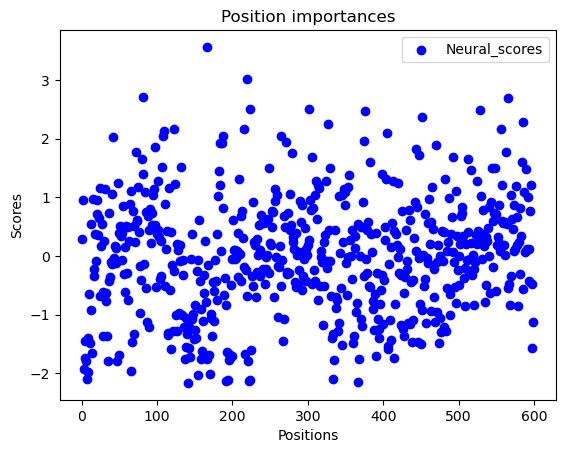

Got to iteration 17 in 385.8441743850708 seconds
Epoch [1/15], Training Loss: 0.1062
Epoch [1/15], Validation Loss: 0.0429
Epoch [1/15], Validation Accuracy: 99.0243%
Epoch [2/15], Training Loss: 0.0534
Epoch [2/15], Validation Loss: 0.0372
Epoch [2/15], Validation Accuracy: 99.1900%
Epoch [3/15], Training Loss: 0.1417
Epoch [3/15], Validation Loss: 0.0425
Epoch [3/15], Validation Accuracy: 99.0427%
Epoch [4/15], Training Loss: 0.0472
Epoch [4/15], Validation Loss: 0.0403
Epoch [4/15], Validation Accuracy: 99.1900%
Epoch [5/15], Training Loss: 0.0035
Epoch [5/15], Validation Loss: 0.0450
Epoch [5/15], Validation Accuracy: 99.1348%
Epoch [6/15], Training Loss: 0.0055
Epoch [6/15], Validation Loss: 0.0421
Epoch [6/15], Validation Accuracy: 99.0979%
Epoch [7/15], Training Loss: 0.0815
Epoch [7/15], Validation Loss: 0.0419
Epoch [7/15], Validation Accuracy: 99.1900%
Epoch [8/15], Training Loss: 0.0031
Epoch [8/15], Validation Loss: 0.0439
Epoch [8/15], Validation Accuracy: 99.1163%
Epoch [

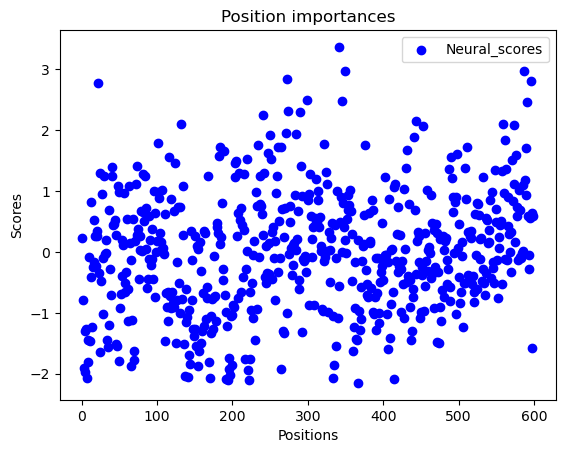

Got to iteration 18 in 408.20163559913635 seconds
Epoch [1/15], Training Loss: 0.0493
Epoch [1/15], Validation Loss: 0.0500
Epoch [1/15], Validation Accuracy: 98.9875%
Epoch [2/15], Training Loss: 0.0244
Epoch [2/15], Validation Loss: 0.0480
Epoch [2/15], Validation Accuracy: 98.9875%
Epoch [3/15], Training Loss: 0.0190
Epoch [3/15], Validation Loss: 0.0526
Epoch [3/15], Validation Accuracy: 98.9323%
Epoch [4/15], Training Loss: 0.0066
Epoch [4/15], Validation Loss: 0.0488
Epoch [4/15], Validation Accuracy: 99.1348%
Epoch [5/15], Training Loss: 0.0159
Epoch [5/15], Validation Loss: 0.0546
Epoch [5/15], Validation Accuracy: 98.9875%
Epoch [6/15], Training Loss: 0.0272
Epoch [6/15], Validation Loss: 0.0536
Epoch [6/15], Validation Accuracy: 99.1900%
Epoch [7/15], Training Loss: 0.0530
Epoch [7/15], Validation Loss: 0.0558
Epoch [7/15], Validation Accuracy: 98.9691%
Epoch [8/15], Training Loss: 0.0058
Epoch [8/15], Validation Loss: 0.0541
Epoch [8/15], Validation Accuracy: 99.0979%
Epoch 

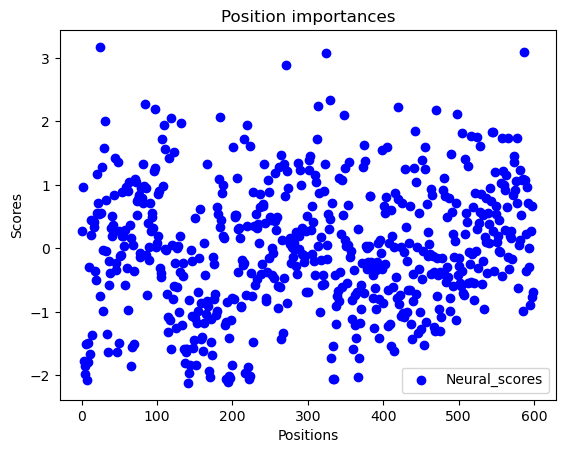

Got to iteration 19 in 432.32765460014343 seconds
Epoch [1/15], Training Loss: 0.0086
Epoch [1/15], Validation Loss: 0.0449
Epoch [1/15], Validation Accuracy: 99.0795%
Epoch [2/15], Training Loss: 0.0772
Epoch [2/15], Validation Loss: 0.0411
Epoch [2/15], Validation Accuracy: 99.2820%
Epoch [3/15], Training Loss: 0.0092
Epoch [3/15], Validation Loss: 0.0411
Epoch [3/15], Validation Accuracy: 99.2636%
Epoch [4/15], Training Loss: 0.0118
Epoch [4/15], Validation Loss: 0.0468
Epoch [4/15], Validation Accuracy: 99.2084%
Epoch [5/15], Training Loss: 0.0121
Epoch [5/15], Validation Loss: 0.0495
Epoch [5/15], Validation Accuracy: 99.1900%
Epoch [6/15], Training Loss: 0.0846
Epoch [6/15], Validation Loss: 0.0486
Epoch [6/15], Validation Accuracy: 99.2268%
Epoch [7/15], Training Loss: 0.0075
Epoch [7/15], Validation Loss: 0.0475
Epoch [7/15], Validation Accuracy: 99.2084%
Epoch [8/15], Training Loss: 0.0179
Epoch [8/15], Validation Loss: 0.0528
Epoch [8/15], Validation Accuracy: 99.1532%
Epoch 

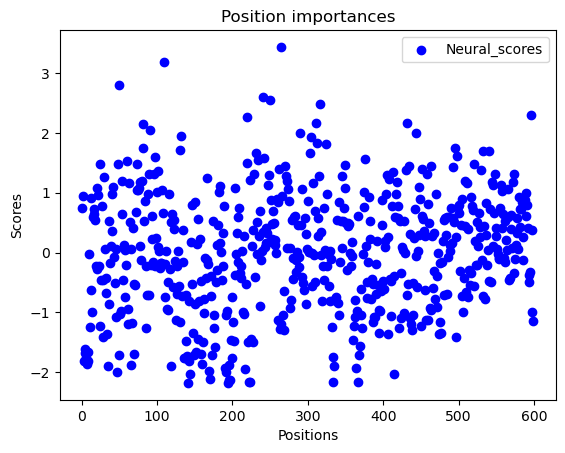

Got to iteration 20 in 454.8059027194977 seconds
Epoch [1/15], Training Loss: 0.0363
Epoch [1/15], Validation Loss: 0.0457
Epoch [1/15], Validation Accuracy: 99.0427%
Epoch [2/15], Training Loss: 0.0119
Epoch [2/15], Validation Loss: 0.0473
Epoch [2/15], Validation Accuracy: 99.0427%
Epoch [3/15], Training Loss: 0.0126
Epoch [3/15], Validation Loss: 0.0457
Epoch [3/15], Validation Accuracy: 99.1348%
Epoch [4/15], Training Loss: 0.0548
Epoch [4/15], Validation Loss: 0.0454
Epoch [4/15], Validation Accuracy: 99.1900%
Epoch [5/15], Training Loss: 0.0084
Epoch [5/15], Validation Loss: 0.0514
Epoch [5/15], Validation Accuracy: 99.0611%
Epoch [6/15], Training Loss: 0.0137
Epoch [6/15], Validation Loss: 0.0520
Epoch [6/15], Validation Accuracy: 99.0427%
Epoch [7/15], Training Loss: 0.0031
Epoch [7/15], Validation Loss: 0.0574
Epoch [7/15], Validation Accuracy: 99.0979%
Epoch [8/15], Training Loss: 0.0989
Epoch [8/15], Validation Loss: 0.0563
Epoch [8/15], Validation Accuracy: 98.9875%
Epoch [

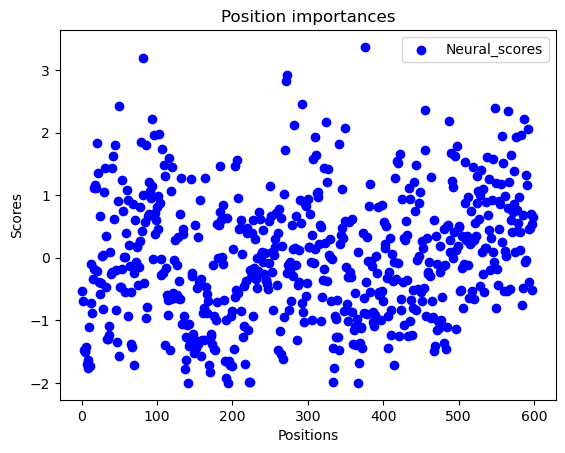

Got to iteration 21 in 476.6966018676758 seconds
Epoch [1/15], Training Loss: 0.0113
Epoch [1/15], Validation Loss: 0.0506
Epoch [1/15], Validation Accuracy: 98.9691%
Epoch [2/15], Training Loss: 0.0728
Epoch [2/15], Validation Loss: 0.0501
Epoch [2/15], Validation Accuracy: 99.0243%
Epoch [3/15], Training Loss: 0.0257
Epoch [3/15], Validation Loss: 0.0535
Epoch [3/15], Validation Accuracy: 98.9691%
Epoch [4/15], Training Loss: 0.0829
Epoch [4/15], Validation Loss: 0.0595
Epoch [4/15], Validation Accuracy: 99.0427%
Epoch [5/15], Training Loss: 0.0067
Epoch [5/15], Validation Loss: 0.0560
Epoch [5/15], Validation Accuracy: 99.0243%
Epoch [6/15], Training Loss: 0.0097
Epoch [6/15], Validation Loss: 0.0622
Epoch [6/15], Validation Accuracy: 98.9507%
Epoch [7/15], Training Loss: 0.0204
Epoch [7/15], Validation Loss: 0.0646
Epoch [7/15], Validation Accuracy: 98.9323%
Epoch [8/15], Training Loss: 0.0259
Epoch [8/15], Validation Loss: 0.0623
Epoch [8/15], Validation Accuracy: 98.8402%
Epoch [

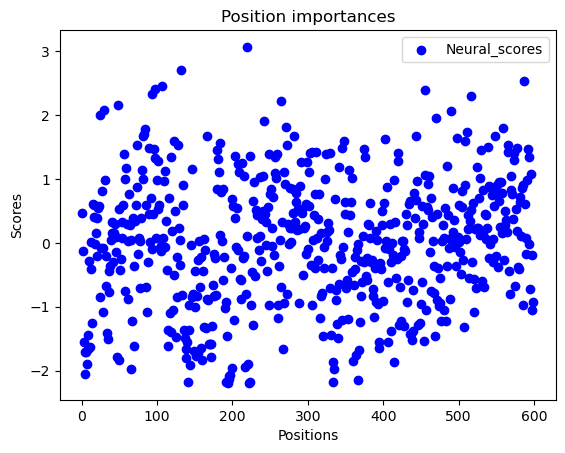

Got to iteration 22 in 498.2199420928955 seconds
Epoch [1/15], Training Loss: 0.0155
Epoch [1/15], Validation Loss: 0.0436
Epoch [1/15], Validation Accuracy: 99.0611%
Epoch [2/15], Training Loss: 0.0382
Epoch [2/15], Validation Loss: 0.0402
Epoch [2/15], Validation Accuracy: 99.1348%
Epoch [3/15], Training Loss: 0.0079
Epoch [3/15], Validation Loss: 0.0454
Epoch [3/15], Validation Accuracy: 99.0795%
Epoch [4/15], Training Loss: 0.0069
Epoch [4/15], Validation Loss: 0.0418
Epoch [4/15], Validation Accuracy: 99.1716%
Epoch [5/15], Training Loss: 0.0054
Epoch [5/15], Validation Loss: 0.0425
Epoch [5/15], Validation Accuracy: 99.1716%
Epoch [6/15], Training Loss: 0.0339
Epoch [6/15], Validation Loss: 0.0473
Epoch [6/15], Validation Accuracy: 99.0979%
Epoch [7/15], Training Loss: 0.0436
Epoch [7/15], Validation Loss: 0.0527
Epoch [7/15], Validation Accuracy: 99.0059%
Epoch [8/15], Training Loss: 0.0313
Epoch [8/15], Validation Loss: 0.0462
Epoch [8/15], Validation Accuracy: 99.1532%
Epoch [

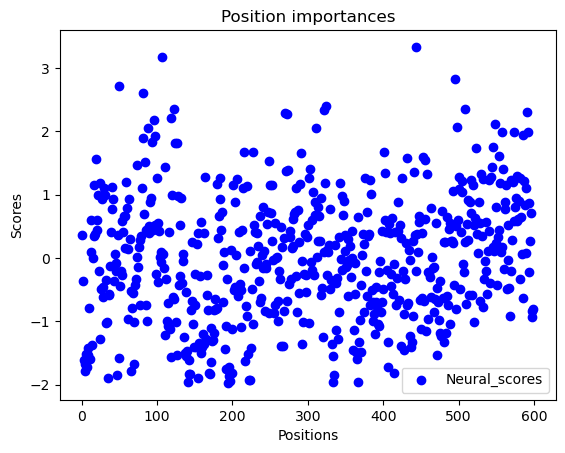

Got to iteration 23 in 519.7196207046509 seconds
Epoch [1/15], Training Loss: 0.0345
Epoch [1/15], Validation Loss: 0.0484
Epoch [1/15], Validation Accuracy: 98.9875%
Epoch [2/15], Training Loss: 0.0236
Epoch [2/15], Validation Loss: 0.0485
Epoch [2/15], Validation Accuracy: 99.0059%
Epoch [3/15], Training Loss: 0.0122
Epoch [3/15], Validation Loss: 0.0483
Epoch [3/15], Validation Accuracy: 99.0059%
Epoch [4/15], Training Loss: 0.0057
Epoch [4/15], Validation Loss: 0.0455
Epoch [4/15], Validation Accuracy: 99.0611%
Epoch [5/15], Training Loss: 0.0043
Epoch [5/15], Validation Loss: 0.0562
Epoch [5/15], Validation Accuracy: 99.0059%
Epoch [6/15], Training Loss: 0.0097
Epoch [6/15], Validation Loss: 0.0450
Epoch [6/15], Validation Accuracy: 99.1532%
Epoch [7/15], Training Loss: 0.0060
Epoch [7/15], Validation Loss: 0.0550
Epoch [7/15], Validation Accuracy: 99.0611%
Epoch [8/15], Training Loss: 0.0157
Epoch [8/15], Validation Loss: 0.0559
Epoch [8/15], Validation Accuracy: 99.1348%
Epoch [

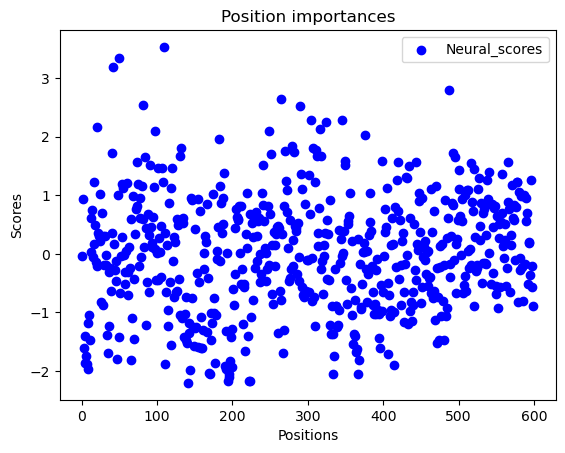

Got to iteration 24 in 541.7460746765137 seconds
Epoch [1/15], Training Loss: 0.0827
Epoch [1/15], Validation Loss: 0.0624
Epoch [1/15], Validation Accuracy: 98.7113%
Epoch [2/15], Training Loss: 0.0159
Epoch [2/15], Validation Loss: 0.0559
Epoch [2/15], Validation Accuracy: 98.9507%
Epoch [3/15], Training Loss: 0.0154
Epoch [3/15], Validation Loss: 0.0609
Epoch [3/15], Validation Accuracy: 98.8954%
Epoch [4/15], Training Loss: 0.0081
Epoch [4/15], Validation Loss: 0.0587
Epoch [4/15], Validation Accuracy: 99.0243%
Epoch [5/15], Training Loss: 0.0661
Epoch [5/15], Validation Loss: 0.0697
Epoch [5/15], Validation Accuracy: 98.7850%
Epoch [6/15], Training Loss: 0.0150
Epoch [6/15], Validation Loss: 0.0622
Epoch [6/15], Validation Accuracy: 98.8218%
Epoch [7/15], Training Loss: 0.0076
Epoch [7/15], Validation Loss: 0.0641
Epoch [7/15], Validation Accuracy: 99.0059%
Epoch [8/15], Training Loss: 0.0229
Epoch [8/15], Validation Loss: 0.0786
Epoch [8/15], Validation Accuracy: 98.7297%
Epoch [

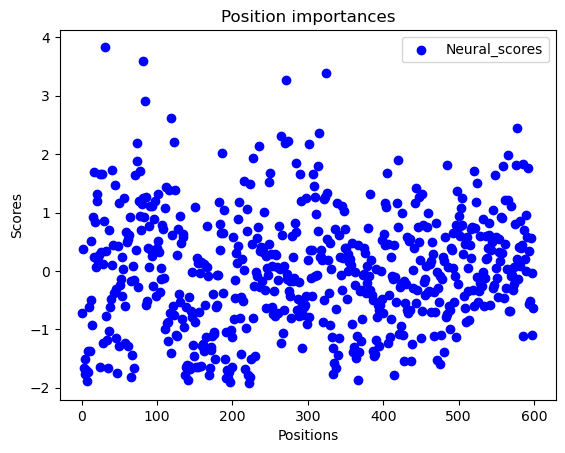

Got to iteration 25 in 566.2480635643005 seconds
Epoch [1/15], Training Loss: 0.0368
Epoch [1/15], Validation Loss: 0.0568
Epoch [1/15], Validation Accuracy: 98.9691%
Epoch [2/15], Training Loss: 0.0148
Epoch [2/15], Validation Loss: 0.0533
Epoch [2/15], Validation Accuracy: 99.0611%
Epoch [3/15], Training Loss: 0.1059
Epoch [3/15], Validation Loss: 0.0617
Epoch [3/15], Validation Accuracy: 98.9691%
Epoch [4/15], Training Loss: 0.0528
Epoch [4/15], Validation Loss: 0.0578
Epoch [4/15], Validation Accuracy: 98.9138%
Epoch [5/15], Training Loss: 0.0087
Epoch [5/15], Validation Loss: 0.0633
Epoch [5/15], Validation Accuracy: 98.7666%
Epoch [6/15], Training Loss: 0.0079
Epoch [6/15], Validation Loss: 0.0578
Epoch [6/15], Validation Accuracy: 98.8954%
Epoch [7/15], Training Loss: 0.0242
Epoch [7/15], Validation Loss: 0.0678
Epoch [7/15], Validation Accuracy: 98.9507%
Epoch [8/15], Training Loss: 0.0078
Epoch [8/15], Validation Loss: 0.0621
Epoch [8/15], Validation Accuracy: 99.0427%
Epoch [

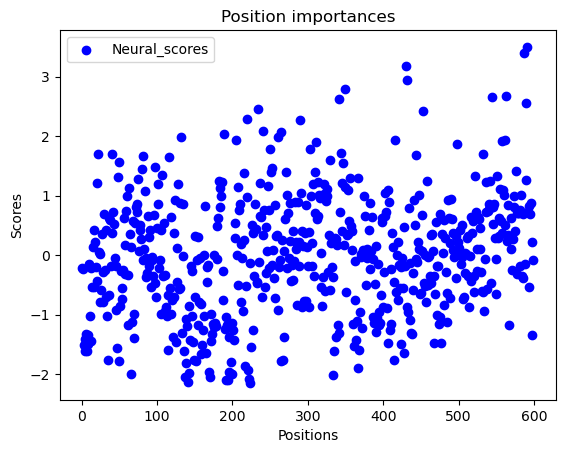

Got to iteration 26 in 588.5634219646454 seconds
Epoch [1/15], Training Loss: 0.0376
Epoch [1/15], Validation Loss: 0.0453
Epoch [1/15], Validation Accuracy: 99.0243%
Epoch [2/15], Training Loss: 0.0347
Epoch [2/15], Validation Loss: 0.0434
Epoch [2/15], Validation Accuracy: 98.9875%
Epoch [3/15], Training Loss: 0.0998
Epoch [3/15], Validation Loss: 0.0461
Epoch [3/15], Validation Accuracy: 99.0795%
Epoch [4/15], Training Loss: 0.0138
Epoch [4/15], Validation Loss: 0.0449
Epoch [4/15], Validation Accuracy: 99.0795%
Epoch [5/15], Training Loss: 0.0677
Epoch [5/15], Validation Loss: 0.0460
Epoch [5/15], Validation Accuracy: 99.0979%
Epoch [6/15], Training Loss: 0.0286
Epoch [6/15], Validation Loss: 0.0464
Epoch [6/15], Validation Accuracy: 99.0243%
Epoch [7/15], Training Loss: 0.0075
Epoch [7/15], Validation Loss: 0.0538
Epoch [7/15], Validation Accuracy: 98.9323%
Epoch [8/15], Training Loss: 0.0392
Epoch [8/15], Validation Loss: 0.0507
Epoch [8/15], Validation Accuracy: 99.1532%
Epoch [

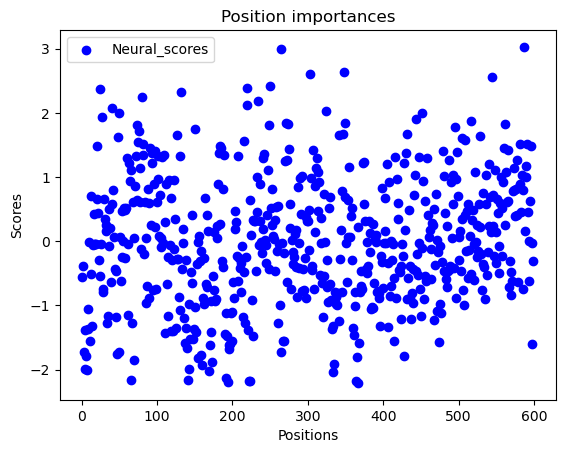

Got to iteration 27 in 610.4145133495331 seconds
Epoch [1/15], Training Loss: 0.0866
Epoch [1/15], Validation Loss: 0.0484
Epoch [1/15], Validation Accuracy: 98.9875%
Epoch [2/15], Training Loss: 0.0213
Epoch [2/15], Validation Loss: 0.0381
Epoch [2/15], Validation Accuracy: 99.1716%
Epoch [3/15], Training Loss: 0.0180
Epoch [3/15], Validation Loss: 0.0450
Epoch [3/15], Validation Accuracy: 99.0795%
Epoch [4/15], Training Loss: 0.0030
Epoch [4/15], Validation Loss: 0.0420
Epoch [4/15], Validation Accuracy: 99.2084%
Epoch [5/15], Training Loss: 0.0073
Epoch [5/15], Validation Loss: 0.0441
Epoch [5/15], Validation Accuracy: 99.0611%
Epoch [6/15], Training Loss: 0.0145
Epoch [6/15], Validation Loss: 0.0448
Epoch [6/15], Validation Accuracy: 99.2268%
Epoch [7/15], Training Loss: 0.0362
Epoch [7/15], Validation Loss: 0.0464
Epoch [7/15], Validation Accuracy: 99.2268%
Epoch [8/15], Training Loss: 0.0024
Epoch [8/15], Validation Loss: 0.0537
Epoch [8/15], Validation Accuracy: 99.0979%
Epoch [

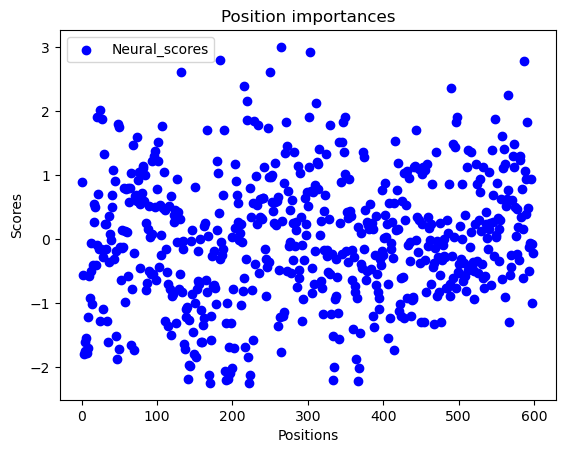

Got to iteration 28 in 632.4078254699707 seconds
Epoch [1/15], Training Loss: 0.0531
Epoch [1/15], Validation Loss: 0.0476
Epoch [1/15], Validation Accuracy: 98.9323%
Epoch [2/15], Training Loss: 0.0058
Epoch [2/15], Validation Loss: 0.0450
Epoch [2/15], Validation Accuracy: 99.0979%
Epoch [3/15], Training Loss: 0.0149
Epoch [3/15], Validation Loss: 0.0440
Epoch [3/15], Validation Accuracy: 99.1900%
Epoch [4/15], Training Loss: 0.0502
Epoch [4/15], Validation Loss: 0.0477
Epoch [4/15], Validation Accuracy: 99.0795%
Epoch [5/15], Training Loss: 0.0374
Epoch [5/15], Validation Loss: 0.0532
Epoch [5/15], Validation Accuracy: 99.0243%
Epoch [6/15], Training Loss: 0.0052
Epoch [6/15], Validation Loss: 0.0491
Epoch [6/15], Validation Accuracy: 99.0979%
Epoch [7/15], Training Loss: 0.0128
Epoch [7/15], Validation Loss: 0.0489
Epoch [7/15], Validation Accuracy: 99.0979%
Epoch [8/15], Training Loss: 0.0282
Epoch [8/15], Validation Loss: 0.0560
Epoch [8/15], Validation Accuracy: 98.9507%
Epoch [

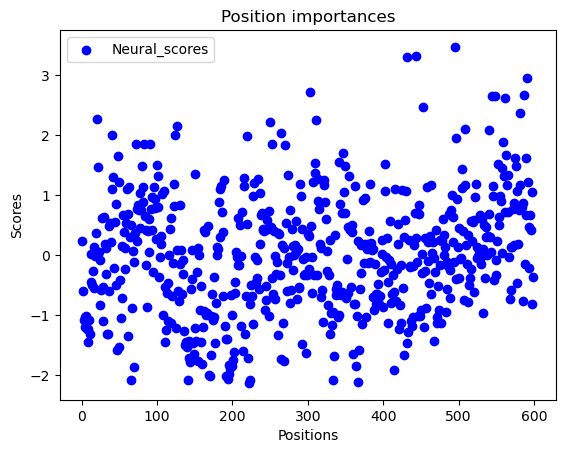

Got to iteration 29 in 653.9426558017731 seconds
Epoch [1/15], Training Loss: 0.0606
Epoch [1/15], Validation Loss: 0.0472
Epoch [1/15], Validation Accuracy: 99.0611%
Epoch [2/15], Training Loss: 0.0107
Epoch [2/15], Validation Loss: 0.0453
Epoch [2/15], Validation Accuracy: 99.1532%
Epoch [3/15], Training Loss: 0.0178
Epoch [3/15], Validation Loss: 0.0474
Epoch [3/15], Validation Accuracy: 99.0611%
Epoch [4/15], Training Loss: 0.0936
Epoch [4/15], Validation Loss: 0.0560
Epoch [4/15], Validation Accuracy: 98.8954%
Epoch [5/15], Training Loss: 0.0506
Epoch [5/15], Validation Loss: 0.0476
Epoch [5/15], Validation Accuracy: 99.0427%
Epoch [6/15], Training Loss: 0.0520
Epoch [6/15], Validation Loss: 0.0452
Epoch [6/15], Validation Accuracy: 99.1716%
Epoch [7/15], Training Loss: 0.1015
Epoch [7/15], Validation Loss: 0.0535
Epoch [7/15], Validation Accuracy: 99.2268%
Epoch [8/15], Training Loss: 0.0204
Epoch [8/15], Validation Loss: 0.0549
Epoch [8/15], Validation Accuracy: 99.2084%
Epoch [

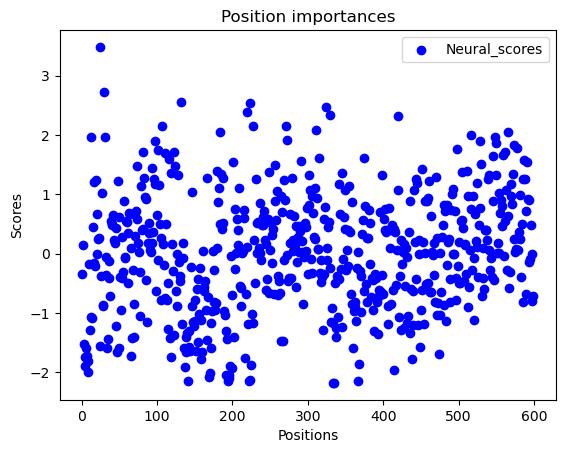

Got to iteration 30 in 677.0824801921844 seconds


In [16]:
best_params_nn = {'layer_dim': 64, 'number_hidden_layer': 3, 'dropout_prob': 0.2, 'l2_regu': 1e-05, 'weight_decay': 0.0001, 'learning_rate': 0.001, 'batch_size': 128, 'num_epochs': 15}
number_hidden_layer = best_params_nn['number_hidden_layer']
dropout_prob = best_params_nn['dropout_prob']
l2_regu = best_params_nn['l2_regu']
weight_decay = best_params_nn['weight_decay']
learning_rate = best_params_nn['learning_rate']
batch_size = best_params_nn['batch_size']
num_epochs = best_params_nn['num_epochs']

positions_to_keep =range(1,600)
level3_extracted = extract_positions(level3,positions_to_keep)

output_dim = 6
tic = time.time()

dfs = []
for i in range(30):
    
    train, train_label, test, test_label, val, val_label=split_dataset(level3_extracted, 0.8, 0.1, 0.1)
    input_dim = train.shape[1]
    
    model_neural = ModelClassification(input_dim, output_dim, layer_dim, number_hidden_layer, dropout_prob, l2_regu)
    optimizer = torch.optim.Adam(model_neural.parameters(), lr = learning_rate, weight_decay=weight_decay)#lr : learning rate
    train_model(model_neural, num_epochs, train, train_label, test, test_label, optimizer, batch_size)
    
    dfs.append(feature_importances_neural(model_neural, level3_extracted.drop(level3_extracted.columns[0], axis=1).columns, smoothness = 0, pos =positions_to_keep, plot = 1))
    t = time.time() - tic
    print(f"Got to iteration {i+1} in {t} seconds")
    
    

arrays = [df.to_numpy() for df in dfs]

stacked_array = np.stack(arrays, axis=0)
mean_values = np.mean(stacked_array, axis=0)
std_values = np.std(stacked_array, axis=0)


np.savetxt('mean_total.txt', mean_values)
np.savetxt('std_total.txt', std_values)

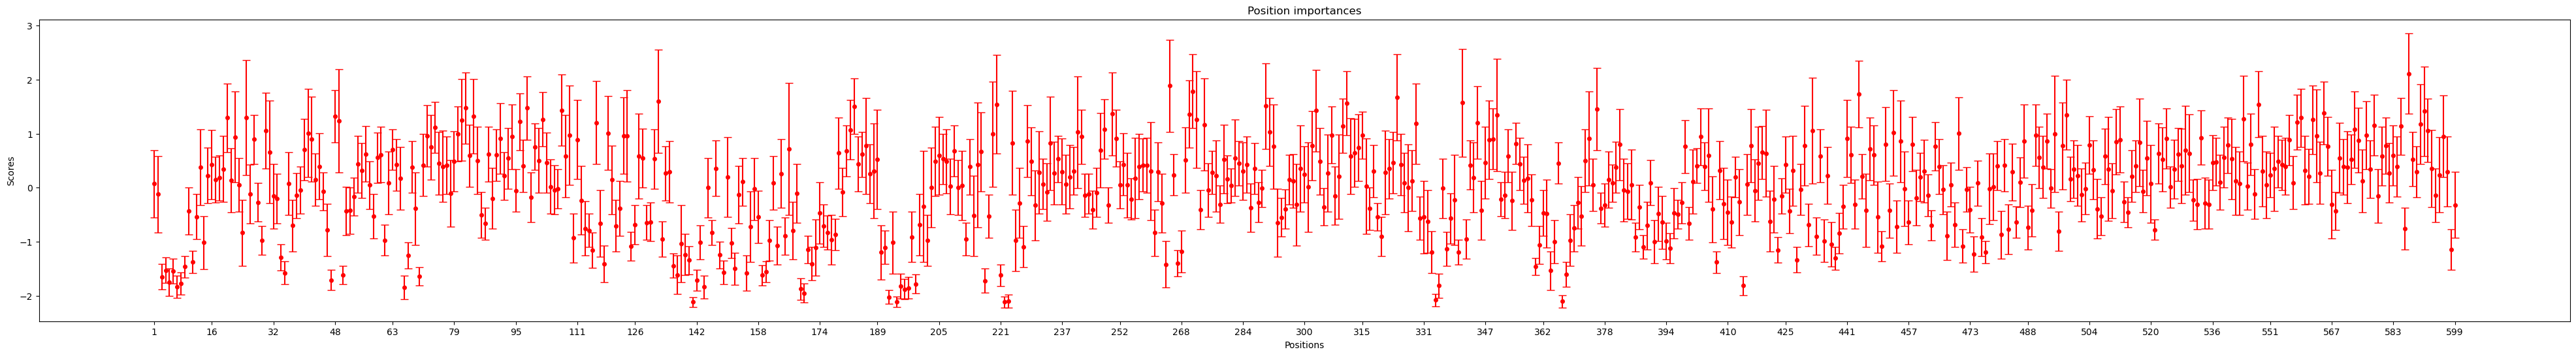

In [46]:
plt.figure(figsize=(50, 6))


plt.errorbar(positions_to_keep, mean_values[:, 0], std_values[:, 0], capsize=4, color="red", fmt="o", markersize=4)

plt.xlabel('Positions')
plt.ylabel('Scores')
plt.title('Position importances')


num_ticks = len(positions_to_keep)//15
xticks_indices = np.linspace(0, len(positions_to_keep) - 1, num_ticks, dtype=int)
plt.xticks(np.array(positions_to_keep)[xticks_indices])

plt.savefig('Postitionimportances.png', dpi=200)
plt.show()


## 7. Features importance
This section computes the features importance in both model and standardizes them. They are then plotted in comparison with the mutual informations to be able to see which region of the sequence is more important for the task. Note that the signal is filtered through a moving average of size `smoothness`. The first cell contains the feature importance calculated by all models and the second is just the feature importance in the neural network However, the importance is divided between each class to observe whether they match. We provide 2 .pkl files to be able to visualize the importances without the need to run the entire notebook. If you want to compute the features importance of the models trained, do not run the first cell.

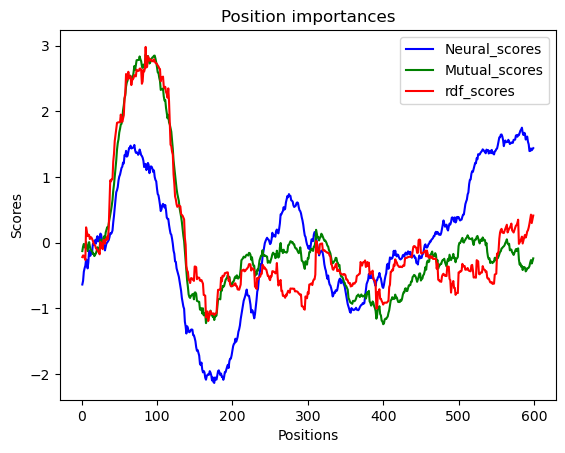

Neural_scores  Mutual_scores  rdf_scores
pos_1        -0.635912      -0.126754   -0.217961
pos_2        -0.580478      -0.057838   -0.192978
pos_3        -0.441222      -0.018056   -0.196879
pos_4        -0.388720      -0.053526   -0.230814
pos_5        -0.349460      -0.079059   -0.262495
...                ...            ...         ...
pos_595       1.397936      -0.300676    0.359578
pos_596       1.435891      -0.263739    0.427610
pos_597       1.408192      -0.316336    0.300138
pos_598       1.425696      -0.282011    0.359709
pos_599       1.440446      -0.238061    0.414144

[599 rows x 3 columns]

In [18]:
feature_importances(model_rdf, model_neural, mutual_data, level3, smoothness = 80, plot = 1)

In [ ]:
features_impo = pd.read_pickle('features_impo.pkl')
features_impo_nn = pd.read_pickle('features_impo_nn.pkl')

In [ ]:
features_impo = feature_importances(model_rdf, model_neural, mutual_data, level3, smoothness = 30)
features_impo.to_pickle("features_impo.pkl")

In [ ]:
features_impo_nn = features_importances_nn(model_neural, level3, smoothness = 30, plot=1)
features_impo_nn.to_pickle("features_impo_nn.pkl")

## Plot finaux

In [10]:
best_params_nn = {'layer_dim': 128, 'number_hidden_layer': 3, 'dropout_prob': 0.2, 'l2_regu': 1e-05, 'weight_decay': 0.0001, 'learning_rate': 0.0001, 'batch_size': 256, 'num_epochs': 10}
layer_dim = best_params_nn['layer_dim']
number_hidden_layer = best_params_nn['number_hidden_layer']
dropout_prob = best_params_nn['dropout_prob']
l2_regu = best_params_nn['l2_regu']
weight_decay = best_params_nn['weight_decay']
learning_rate = best_params_nn['learning_rate']
batch_size = best_params_nn['batch_size']
num_epochs = best_params_nn['num_epochs']


best_para = ({'n_estimators': 100, 'max_depth': 400, 'max_features': 400, 'bootstrap': False, 'class_weight': 'balanced', 'min_samples_leaf': 5}, 0, 0)

dfs = []
for i in range(30):
    
    
    train, train_label, test, test_label, val, val_label=split_dataset(level3, 0.9, 0.1, 0)
    
    model_rdf = train_random_forest(train, train_label,test, test_label,best_para[0])
    model_neural = ModelClassification(input_dim, output_dim, layer_dim, number_hidden_layer, dropout_prob, l2_regu)
    optimizer = torch.optim.Adam(model_neural.parameters(), lr = learning_rate, weight_decay=weight_decay)#lr : learning rate
    train_model(model_neural, num_epochs, train, train_label, test, test_label, optimizer, batch_size)
    
    dfs.append(feature_importances(model_rdf, model_neural, mutual_data, level3, smoothness = 40, plot = 0))

    mutual_data = compute_mutual_info(level3,1)
    
    
    

arrays = [df.to_numpy() for df in dfs]

stacked_array = np.stack(arrays, axis=0)
mean_values = np.mean(stacked_array, axis=0)
std_values = np.std(stacked_array, axis=0)


np.savetxt('mean.txt', mean_values)
np.savetxt('std.txt', std_values)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\pierr\anaconda3\envs\Cuda\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\pierr\AppData\Local\Temp\ipykernel_66192\1665171161.py", line 18, in <module>
    train, train_label, test, test_label, val, val_label=split_dataset(level3, 0.9, 0.1, 0)
                                                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\pierr\Desktop\Semester_project_Ma2\create_batch.py", line 63, in split_dataset
    train_set = torch.tensor(trainset.iloc[:, 1:].values, dtype=torch.float32)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint8, and bool.

During handling of the above exception, another exception occurred:

Traceb

In [30]:
mean_values = np.loadtxt('mean.txt',dtype=float)
std_values = np.loadtxt('std.txt',dtype=float)



plt.plot(np.arange(mean_values.shape[0]), mean_values[:, 0],label='Neural Network', color="red", lw=2) 

plt.fill_between(
    np.arange(mean_values.shape[0]),
    mean_values[:, 0] - std_values[:, 0],
    mean_values[:, 0] + std_values[:, 0],
    color="red",
    alpha=0.3 
)
plt.plot(np.arange(mean_values.shape[0]), mean_values[:, 1], label='Mutual Information', color="green", lw=2) 
plt.fill_between(
    np.arange(mean_values.shape[0]),
    mean_values[:, 1] - std_values[:, 1],
    mean_values[:, 1] + std_values[:, 1],
    color="green",
    alpha=0.3 
)
plt.plot(np.arange(mean_values.shape[0]), mean_values[:, 2], label='Random forest', color="blue", lw=2) 
plt.fill_between(
    np.arange(mean_values.shape[0]),
    mean_values[:, 2] - std_values[:, 2],
    mean_values[:, 2] + std_values[:, 2],
    color="blue",
    alpha=0.3 
)


plt.xlabel('Positions')
plt.ylabel('Scores')
plt.title('Position importances')
plt.legend()

plt.show()


FileNotFoundError: mean.txt not found.